<a href="https://colab.research.google.com/github/anthony0727/ml2_takehome/blob/master/notebook/lenet5_benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## install apache bench

In [ ]:
!apt-get install apache2-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libapr1 libaprutil1
The following NEW packages will be installed:
  apache2-utils libapr1 libaprutil1
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 259 kB of archives.
After this operation, 866 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libapr1 amd64 1.6.3-2 [90.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libaprutil1 amd64 1.6.1-2 [84.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 apache2-utils amd64 2.4.29-1ubuntu4.14 [83.9 kB]
Fetched 259 kB in 1s (398 kB/s)
Selecting previously unselected package libapr1:amd64.
(Reading database ... 144579 files and directories currently inst

## load package

In [ ]:
from PIL import Image
import requests
import json

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets.mnist import load_data

from pprint import PrettyPrinter
pp = PrettyPrinter()

## sample data

In [ ]:
(train_x, train_y), (test_x, test_y) = load_data()

In [ ]:
# sample 5 imgs

sample = train_x[5:10]
sample.shape

(5, 28, 28)

In [ ]:
img = Image.fromarray(sample[0])
img.save('2.png')

img = Image.fromarray(sample[1])
img.save('1.png')

img = Image.fromarray(sample[2])
img.save('3.png')

In [ ]:
url = 'http://ec2-15-165-35-168.ap-northeast-2.compute.amazonaws.com'

## tensorflow/serving

### sample request

In [ ]:
data = json.dumps({"signature_name": "serving_default", "instances": np.expand_dims(sample, axis=-1).tolist()})

In [ ]:
res = requests.post(url+':8501/v1/models/lenet5:predict', data=data)
res = json.loads(res.text)

In [ ]:
predictions = res['predictions']

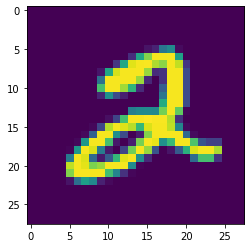

In [ ]:
# true value
plt.imshow(sample[0])

In [ ]:
# prediction
np.argmax(predictions[0])

2

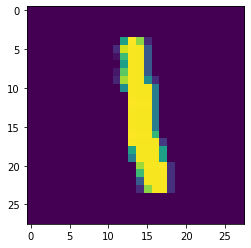

In [ ]:
# true value
plt.imshow(sample[1])

In [ ]:
# prediction
np.argmax(predictions[1])

1

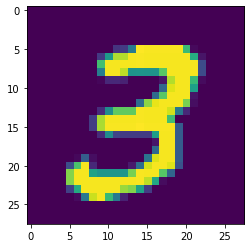

In [ ]:
# true value
plt.imshow(sample[2])

In [ ]:
# prediction
np.argmax(predictions[2])

3

### benchmark

-k
* Enable the HTTP KeepAlive feature, i.e., perform multiple requests within one HTTP session. Default is no KeepAlive.

-n requests
* Number of requests to perform for the benchmarking session. The default is to just perform a single request which usually leads to non-representative benchmarking results.

-c concurrency
* Number of multiple requests to perform at a time. Default is one request at a time.


In [ ]:
!ab -k -l -n 1000 -c 10 -T "image/png" -p 3.png {url}:8501/v1/models/lenet5:predict

This is ApacheBench, Version 2.3 <$Revision: 1807734 $>
Copyright 1996 Adam Twiss, Zeus Technology Ltd, http://www.zeustech.net/
Licensed to The Apache Software Foundation, http://www.apache.org/

Benchmarking ec2-15-165-35-168.ap-northeast-2.compute.amazonaws.com (be patient)
Completed 100 requests
Completed 200 requests
Completed 300 requests
Completed 400 requests
Completed 500 requests
Completed 600 requests
Completed 700 requests
Completed 800 requests
Completed 900 requests
Completed 1000 requests
Finished 1000 requests


Server Software:        
Server Hostname:        ec2-15-165-35-168.ap-northeast-2.compute.amazonaws.com
Server Port:            8501

Document Path:          /v1/models/lenet5:predict
Document Length:        Variable

Concurrency Level:      1000
Time taken for tests:   2.743 seconds
Complete requests:      1000
Failed requests:        0
Non-2xx responses:      1000
Keep-Alive requests:    1000
Total transferred:      168000 bytes
Total body sent:        553000


## pytorch/torchserve

### sample request(not completed)

In [ ]:
!curl '{url}:8081/ping'

{
  "status": "Partial Healthy"
}


In [ ]:
res = requests.get(url+':8082/models/lenet5_libtorch')
json.loads(res.text)

[{'batchSize': 1,
  'loadedAtStartup': True,
  'maxBatchDelay': 100,
  'maxWorkers': 8,
  'minWorkers': 8,
  'modelName': 'lenet5_libtorch',
  'modelUrl': 'lenet5_libtorch.mar',
  'modelVersion': '1.0',
  'runtime': 'python',
  'workers': [{'gpu': False,
    'id': '9008',
    'memoryUsage': 17707008,
    'startTime': '2020-09-10T10:18:45.941Z',
    'status': 'READY'},
   {'gpu': False,
    'id': '9009',
    'memoryUsage': 17739776,
    'startTime': '2020-09-10T10:18:46.019Z',
    'status': 'READY'},
   {'gpu': False,
    'id': '9010',
    'memoryUsage': 17793024,
    'startTime': '2020-09-10T10:18:46.027Z',
    'status': 'READY'},
   {'gpu': False,
    'id': '9011',
    'memoryUsage': 20819968,
    'startTime': '2020-09-10T10:18:46.027Z',
    'status': 'READY'},
   {'gpu': False,
    'id': '9012',
    'memoryUsage': 17739776,
    'startTime': '2020-09-10T10:18:46.032Z',
    'status': 'READY'},
   {'gpu': False,
    'id': '9013',
    'memoryUsage': 21176320,
    'startTime': '2020-09-10

In [ ]:
res = requests.get(url+':8082/models/lenet5_pytorch')
json.loads(res.text)

[{'batchSize': 1,
  'loadedAtStartup': True,
  'maxBatchDelay': 100,
  'maxWorkers': 8,
  'minWorkers': 8,
  'modelName': 'lenet5_pytorch',
  'modelUrl': 'lenet5_pytorch.mar',
  'modelVersion': '1.0',
  'runtime': 'python',
  'workers': [{'gpu': False,
    'id': '9000',
    'memoryUsage': 17702912,
    'startTime': '2020-09-10T10:18:45.923Z',
    'status': 'READY'},
   {'gpu': False,
    'id': '9001',
    'memoryUsage': 17858560,
    'startTime': '2020-09-10T10:18:45.925Z',
    'status': 'READY'},
   {'gpu': False,
    'id': '9002',
    'memoryUsage': 17735680,
    'startTime': '2020-09-10T10:18:45.925Z',
    'status': 'READY'},
   {'gpu': False,
    'id': '9003',
    'memoryUsage': 17723392,
    'startTime': '2020-09-10T10:18:45.925Z',
    'status': 'READY'},
   {'gpu': False,
    'id': '9004',
    'memoryUsage': 20602880,
    'startTime': '2020-09-10T10:18:45.925Z',
    'status': 'READY'},
   {'gpu': False,
    'id': '9005',
    'memoryUsage': 17715200,
    'startTime': '2020-09-10T1

In [ ]:
!curl -X POST {url}:8081/predictions/lenet5_libtorch -T 3.png

{
  "code": 503,
  "type": "InternalServerException",
  "message": "Prediction failed"
}


In [ ]:
!curl -X POST {url}:8081/predictions/lenet5_pytorch -T 3.png

^C


In [ ]:
!curl -X POST http://localhost:8081/predictions/lenet5 -F "data=@test.png"

{
  "code": 503,
  "type": "InternalServerException",
  "message": "Prediction failed"
}


### benchmark(not completed)

In [ ]:
!ab -k -l -n 1000 -c 1000 -T "image/png" -p 3.png {url}:8081/predictions/lenet5_libtorch